# Preprocesamiento de datos Boston Housing

In [1]:
import sys
import os
import pandas as pd
import numpy as np

current_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from preprocess_data import Preprocesador

In [2]:
# Carga el toy dataset iris de sklearn
from sklearn.datasets import load_iris
iris = load_iris()
# Convierte el dataset a un DataFrame de pandas
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Añade la columna de etiquetas
iris_df['target'] = iris.target

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df_boston = pd.read_csv(data_url)

In [5]:
data_preprocessor = Preprocesador(df_boston, 'medv')

## 1. Exploración de los datos

 Primeras filas del dataset:

+---+---------+------+-------+------+-------+-------+------+--------+-----+-------+---------+--------+-------+------+
|   |  crim   |  zn  | indus | chas |  nox  |  rm   | age  |  dis   | rad |  tax  | ptratio |   b    | lstat | medv |
+---+---------+------+-------+------+-------+-------+------+--------+-----+-------+---------+--------+-------+------+
| 0 | 0.00632 | 18.0 | 2.31  | 0.0  | 0.538 | 6.575 | 65.2 |  4.09  | 1.0 | 296.0 |  15.3   | 396.9  | 4.98  | 24.0 |
| 1 | 0.02731 | 0.0  | 7.07  | 0.0  | 0.469 | 6.421 | 78.9 | 4.9671 | 2.0 | 242.0 |  17.8   | 396.9  | 9.14  | 21.6 |
| 2 | 0.02729 | 0.0  | 7.07  | 0.0  | 0.469 | 7.185 | 61.1 | 4.9671 | 2.0 | 242.0 |  17.8   | 392.83 | 4.03  | 34.7 |
| 3 | 0.03237 | 0.0  | 2.18  | 0.0  | 0.458 | 6.998 | 45.8 | 6.0622 | 3.0 | 222.0 |  18.7   | 394.63 | 2.94  | 33.4 |
| 4 | 0.06905 | 0.0  | 2.18  | 0.0  | 0.458 | 7.147 | 54.2 | 6.0622 | 3.0 | 222.0 |  18.7   | 396.9  | 5.33  | 36.2 |
+---+---------+------+-------+------+-------+-------+---

 Info del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB



 Estadísticas descriptivas:

+-------+---------------------+--------------------+-------------------+---------------------+---------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+
|       |        crim         |         zn         |       indus       |        chas         |         nox         |         rm         |        age         |        dis         |        rad        |        tax         |      ptratio       |         b         |       lstat        |        medv        |
+-------+---------------------+--------------------+-------------------+---------------------+---------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+
| count |        506.0        |       506.0        |       506.0       |        506.0   

 Valores nulos por columna:

+---------+---------------+
|         | Valores nulos |
+---------+---------------+
|  crim   |       0       |
|   zn    |       0       |
|  indus  |       0       |
|  chas   |       0       |
|   nox   |       0       |
|   rm    |       0       |
|   age   |       0       |
|   dis   |       0       |
|   rad   |       0       |
|   tax   |       0       |
| ptratio |       0       |
|    b    |       0       |
|  lstat  |       0       |
|  medv   |       0       |
+---------+---------------+


 Valores duplicados:

Duplicados: 0


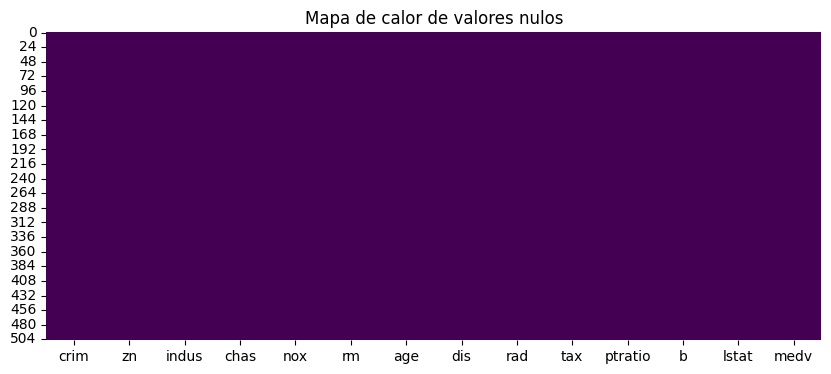

 Columnas categóricas:

[]


 Columnas numéricas:

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


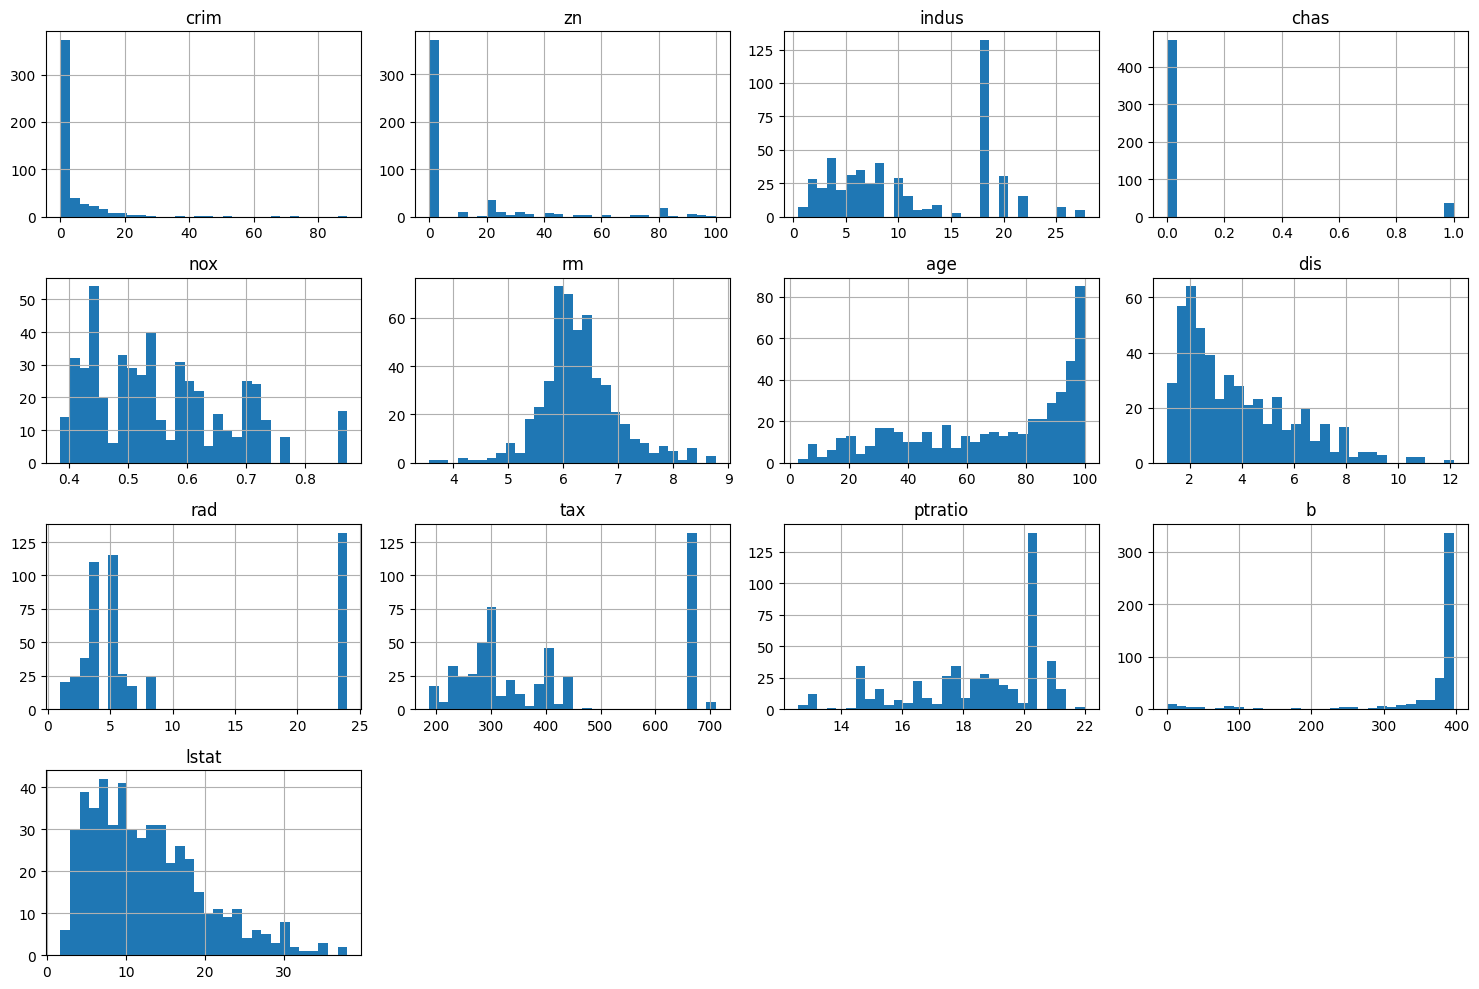

 Outliers detectados por z-score (>3):

+---------+----------------+
|         | Outliers (z>3) |
+---------+----------------+
|  crim   |       8        |
|   zn    |       14       |
|  indus  |       0        |
|  chas   |       35       |
|   nox   |       0        |
|   rm    |       8        |
|   age   |       0        |
|   dis   |       5        |
|   rad   |       0        |
|   tax   |       0        |
| ptratio |       0        |
|    b    |       25       |
|  lstat  |       5        |
+---------+----------------+


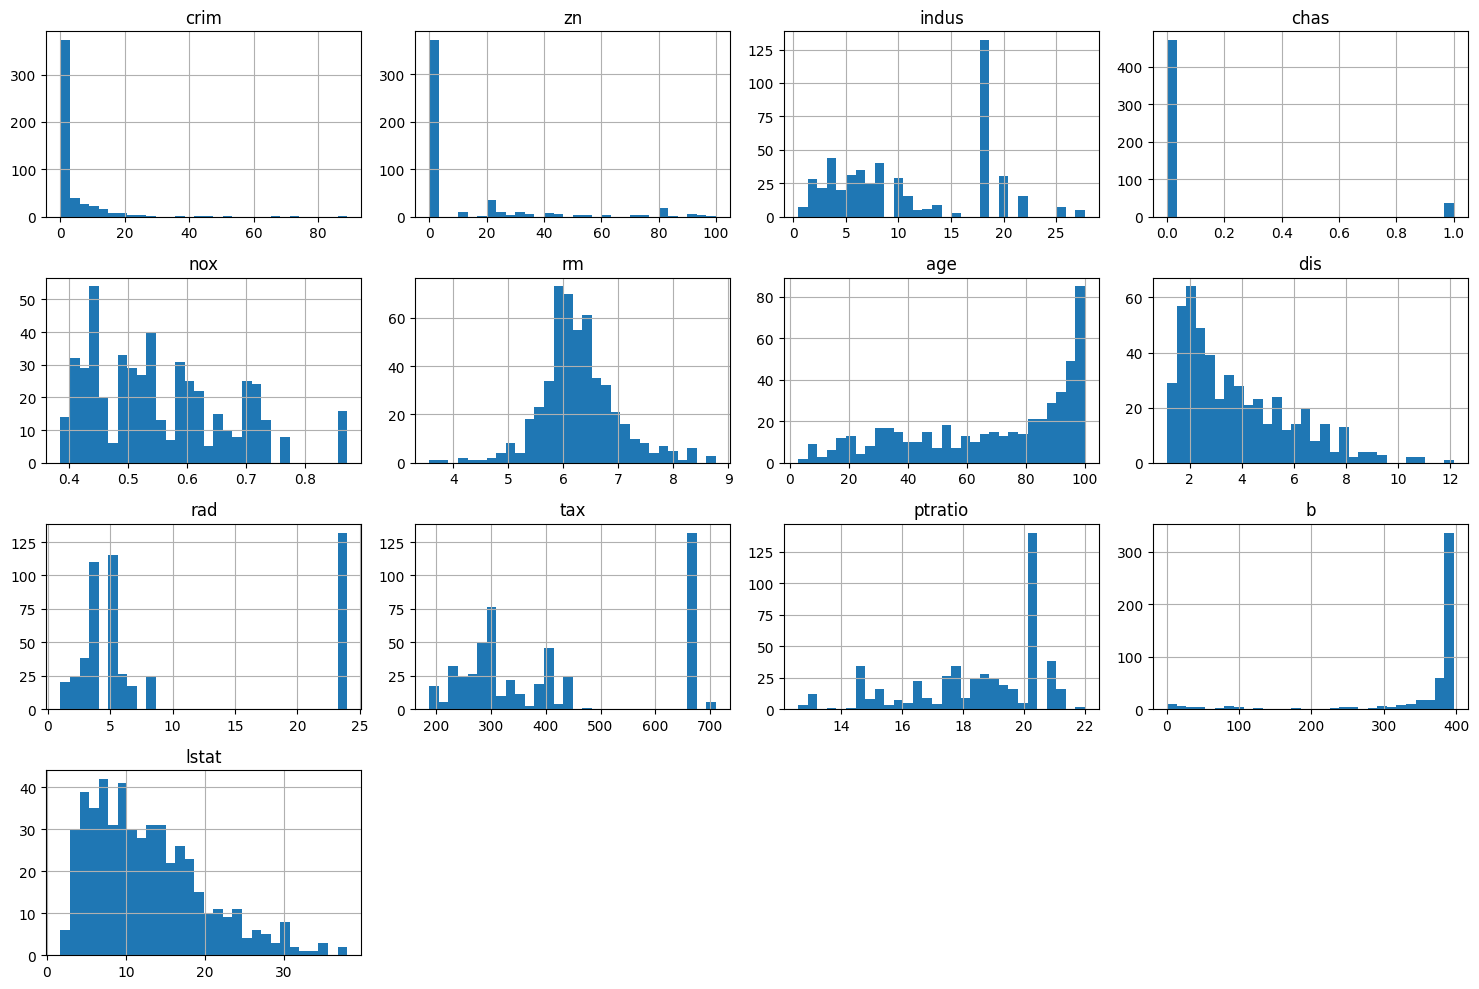

In [6]:
data_preprocessor.explorar_datos()

In [7]:
col_categoricas, columnas_numericas = data_preprocessor.obtener_tipos_columnas()

 Columnas categóricas:

[]


 Columnas numéricas:

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


## 2. Limpieza

No hay valores nulos pero si valores atípicos

In [8]:
data_preprocessor.manejar_outliers(['zn', 'chas', 'crim', 'b', 'lstat'])

 Outliers en 'zn': 68 reemplazados por 0.0

Valores fuera de rango: [ 75.   75.   75.   90.   85.  100.   80.   80.   45.   45.   45.   45.
  45.   45.   60.   60.   80.   80.   80.   80.   95.   95.   82.5  82.5
  95.   95.   80.   80.   90.   40.   40.   40.   40.   40.   90.   90.
  55.   80.   52.5  52.5  52.5  80.   80.   80.   70.   70.   70.   34.
  34.   34.   33.   33.   33.   33.   35.   35.   35.   55.   55.   85.
  80.   40.   40.   60.   60.   90.   80.   80. ]

  Rango: [-18.75, 31.25]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'chas': 35 reemplazados por 0.0

Valores fuera de rango: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'crim': 66 reemplazados por 0.25651

Valores fuera de rango: [13.5222   9.2323  11.1081  18.4982  19.6091  15.288    9.82349 23.6482
 17.8667  88.9762  15.8744   9.18702 20.0849  16.8118  24.3938  22.5971
 14.3337  11.5779  13.3598  38.3518   9.91655 25.0461  14.2362   9.59571
 24.8017  41.5292  67.9208  20.7162  11.9511  14.4383  51.1358  14.0507
 18.811   28.6558  45.7461  18.0846  10.8342  25.9406  73.5341  11.8123
 11.0874  12.0482  15.8603  12.2472  37.6619   9.33889 10.0623  13.9134
 11.1604  14.4208  15.1772  13.6781   9.39063 22.0511   9.72418  9.96654
 12.8023  10.6718   9.92485  9.32909  9.51363 15.5757  13.0751  15.0234
 10.233   14.3337 ]

  Rango: [-5.31051125, 9.06963875]
  Reemplazando outliers por mediana (0.25651)


 Outliers en 'b': 77 reemplazados por 391.44

Valores fuera de rango: [2.8899e+02 3.0342e+02 3.0638e+02 2.3260e+02 2.4831e+02 7.0800e+01
 3.3863e+02 2.6276e+02 1.7291e+02 1.6927e+02 3.4160e+02 3.4328e+02
 2.6195e+02 3.2102e+02 8.8010e+01 8.8630e+01 3.3892e+02 2.4016e+02
 2.2761e+02 2.9709e+02 3.3004e+02 2.9229e+02 3.4160e+02 3.1603e+02
 1.3142e+02 2.8583e+02 3.3816e+02 3.2946e+02 3.3209e+02 3.1464e+02
 1.7936e+02 2.6000e+00 3.5050e+01 2.8790e+01 2.1097e+02 8.8270e+01
 2.7250e+01 2.1570e+01 1.2736e+02 1.6450e+01 4.8450e+01 3.1875e+02
 3.1998e+02 2.9155e+02 2.5200e+00 3.6500e+00 7.6800e+00 2.4650e+01
 1.8820e+01 9.6730e+01 6.0720e+01 8.3450e+01 8.1330e+01 9.7950e+01
 1.0019e+02 1.0063e+02 1.0985e+02 2.7490e+01 9.3200e+00 6.8950e+01
 2.4052e+02 4.3060e+01 3.1801e+02 3.0421e+02 3.2000e-01 6.6800e+00
 5.0920e+01 1.0480e+01 3.5000e+00 2.7221e+02 2.5523e+02 3.3440e+02
 2.2010e+01 3.3129e+02 3.0276e+02 3.4405e+02 3.1843e+02]

  Rango: [344.10624999999993, 427.49625000000003]
  Reemplazando outliers por mediana (391.44)


 Outliers en 'lstat': 7 reemplazados por 11.36

Valores fuera de rango: [34.41 34.77 37.97 31.99 34.37 36.98 34.02]

  Rango: [-8.057500000000005, 31.962500000000006]
  Reemplazando outliers por mediana (11.36)


## 3. Normalización y Estandarización

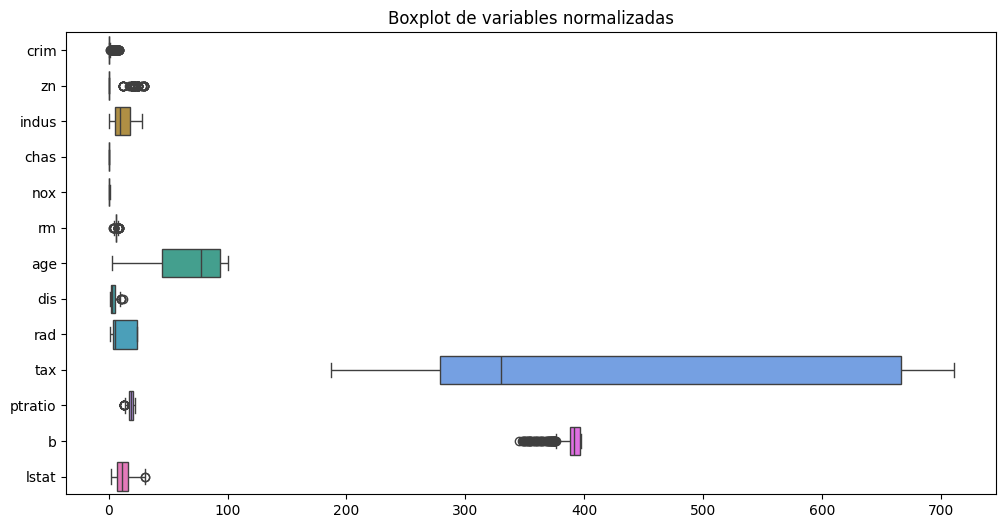

In [9]:
data_preprocessor.plot_boxplot()

In [10]:
df_boston = data_preprocessor.normalizar()

In [11]:
data_preprocessor.manejar_outliers(['zn', 'chas', 'crim', 'b', 'lstat'])

 Outliers en 'zn': 66 reemplazados por -0.3760446078545245

Valores fuera de rango: [2.07301817 1.32469343 1.32469343 1.32469343 1.32469343 1.32469343
 1.32469343 1.32469343 2.48119529 2.48119529 2.48119529 2.48119529
 3.02543147 3.02543147 3.02543147 3.02543147 3.02543147 3.02543147
 2.00498864 1.32469343 1.32469343 1.32469343 3.02543147 3.02543147
 3.02543147 3.02543147 3.43360859 3.43360859 3.43360859 3.70572668
 3.70572668 3.70572668 3.70572668 3.70572668 3.70572668 2.61725434
 2.61725434 2.61725434 2.61725434 2.61725434 2.61725434 2.61725434
 2.61725434 2.61725434 2.61725434 2.34513625 2.34513625 2.34513625
 2.34513625 2.34513625 2.34513625 2.34513625 2.34513625 2.34513625
 2.34513625 2.34513625 2.34513625 2.34513625 2.34513625 2.34513625
 2.34513625 2.34513625 2.34513625 2.34513625 2.34513625 2.34513625]

  Rango: [-0.3760446078545245, -0.3760446078545245]
  Reemplazando outliers por mediana (-0.3760446078545245)


 Outliers en 'crim': 91 reemplazados por -0.4086259083280427

Valores fuera de rango: [0.26766379 0.27554436 1.11860134 1.50533227 0.84895322 0.649498
 0.5377702  0.64415794 0.62541294 0.82615336 0.28947236 0.20963049
 0.53484612 1.22518336 0.68304274 0.37772781 0.22093827 0.58126279
 0.92081489 0.46560965 0.3610451  0.61017484 0.68446244 0.61689972
 0.77709156 3.93902473 1.38194301 2.05546305 1.58698238 1.72676543
 1.37553693 1.29652198 1.56759478 1.19493132 1.73371448 1.30585214
 1.90425268 2.28869714 2.72147114 3.58250101 3.44562711 3.52496087
 2.9323786  2.10093326 3.77055381 3.80641491 2.38935628 3.28599319
 3.15242693 2.96248618 2.97634941 3.84395971 3.13410535 3.69452272
 2.67429231 2.24440752 2.28689886 2.59659245 3.21325978 2.81061826
 2.17470281 1.99987064 3.57295665 1.83159897 1.78998436 3.54929002
 3.32594899 2.85218804 1.86136781 1.30393928 2.77933508 2.36400096
 3.369332   1.04016921 1.344722   1.66716797 1.63055966 1.475947
 1.24195573 1.77905517 3.47716434 2.64892205 1.89089755 2.36542564
 2.30772609 2.31917334 0.86820135 0.64911443 1.29425544 2.29954165
 1.87309403]

  Rango: [-0.9087297440954735, 0.19487932115409218]
  Reemplazando outliers por mediana (-0.4086259083280427)


 Outliers en 'b': 52 reemplazados por 0.22490005628006116

Valores fuera de rango: [-2.80271034 -2.93823886 -1.49679622 -3.01471567 -4.27997124 -1.82109661
 -2.8878997  -3.1105537  -3.60813699 -1.58004945 -2.48712249 -3.41065257
 -2.40193314 -1.42225553 -1.91887076 -3.96825564 -3.36999401 -3.89081077
 -1.64974983 -2.79980616 -1.58488976 -1.39514982 -1.61005934 -1.39514982
 -1.68460003 -2.02148521 -1.69815288 -3.74366551 -1.34674678 -1.9895392
 -2.60135368 -2.37289131 -1.77559775 -1.40967074 -3.7243043  -3.49293775
 -3.34676055 -3.33223964 -1.31673689 -1.33513005 -2.22380994 -3.99245716
 -2.52681299 -1.56843272 -1.82980916 -3.27512405 -1.28285476 -1.97308217
 -1.39805401 -3.53746855 -3.83756742 -1.78043805]

  Rango: [-1.2751102745144152, 1.8652792144157453]
  Reemplazando outliers por mediana (0.22490005628006116)


 Outliers en 'lstat': 2 reemplazados por -0.14745701029860347

Valores fuera de rango: [2.78962081 2.78962081]

  Rango: [-2.9651122794791562, 2.77773515231569]
  Reemplazando outliers por mediana (-0.14745701029860347)


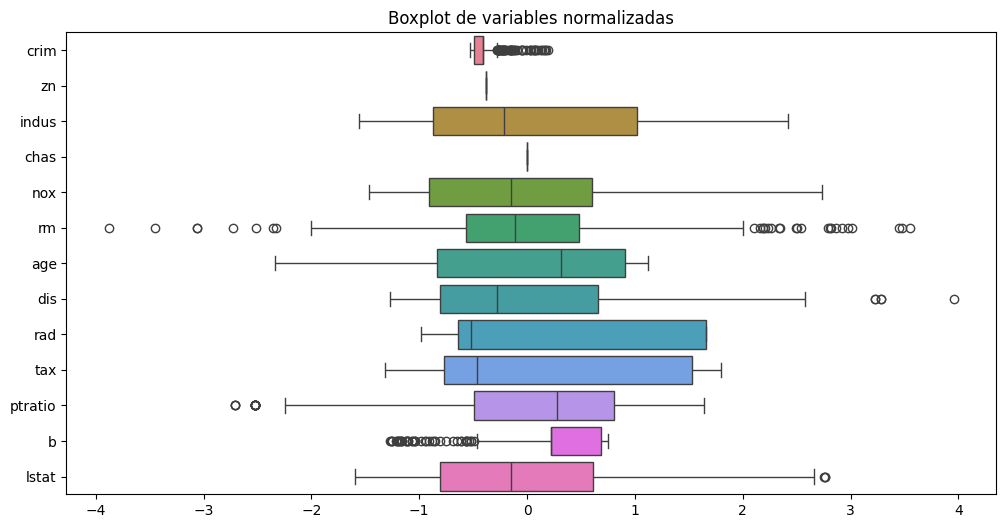

In [12]:
data_preprocessor.plot_boxplot()

## 4. Codificación de Variables Categóricas

Este dataset no contiene variables categóricas

## 5. Reducción de Dimensionalidad

Como este problema es de regresión, para predecir el precio de las viviendas no aplica reducir dimensaionalidad porque no tenemos clases para separar

## 6. Manejo de Datos Desbalanceados

Como este problema es de regresión no aplica revisar datos desbalanceados

## 7.  División del Dataset

In [13]:
X_train, X_test, y_train, y_test = data_preprocessor.dividir_datos()

Train: (404, 13), Test: (102, 13)


## 8. Ingeniería de Características

In [14]:
df_boston = data_preprocessor.df
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.532598,-0.376045,-1.287909,0.0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.752977,-1.108875,24.0
1,-0.522142,-0.376045,-0.593381,0.0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.752977,-0.481010,21.6
2,-0.522152,-0.376045,-0.593381,0.0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.358976,-1.252257,34.7
3,-0.519621,-0.376045,-1.306878,0.0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.533227,-1.416770,33.4
4,-0.501350,-0.376045,-1.306878,0.0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.752977,-1.056049,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.504548,-0.376045,0.115738,0.0,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.277659,-0.401018,22.4
502,-0.513195,-0.376045,0.115738,0.0,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.752977,-0.490066,20.6
503,-0.505479,-0.376045,0.115738,0.0,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.752977,-1.009261,23.9
504,-0.481155,-0.376045,0.115738,0.0,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.418996,-0.882481,22.0


In [15]:
df_boston["RM_LSTAT"] = df_boston["rm"] * df_boston["lstat"]
df_boston["log_TAX"] = np.log1p(df_boston["tax"])


/opt/miniconda3/envs/python39/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,RM_LSTAT,log_TAX
0,-0.532598,-0.376045,-1.287909,0.0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.752977,-1.108875,24.0,-0.458710,-1.098437
1,-0.522142,-0.376045,-0.593381,0.0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.752977,-0.481010,21.6,-0.093448,-4.368478
2,-0.522152,-0.376045,-0.593381,0.0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.358976,-1.252257,34.7,-1.606287,-4.368478
3,-0.519621,-0.376045,-1.306878,0.0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.533227,-1.416770,33.4,-1.439867,NaN
4,-0.501350,-0.376045,-1.306878,0.0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.752977,-1.056049,36.2,-1.297438,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.504548,-0.376045,0.115738,0.0,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.277659,-0.401018,22.4,-0.176173,-1.625627
502,-0.513195,-0.376045,0.115738,0.0,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.752977,-0.490066,20.6,0.114944,-1.625627
503,-0.505479,-0.376045,0.115738,0.0,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.752977,-1.009261,23.9,-0.994082,-1.625627
504,-0.481155,-0.376045,0.115738,0.0,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.418996,-0.882481,22.0,-0.640392,-1.625627
